# Bisection Method

In [1]:
using Plots
using Printf

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [17]:
function bisection(f, a, b, n_max, tol; verbose = true)
    
    converged = false;
    p = 0;
    for i in 1:n_max

        p = 0.5 * (a+b); # compute the midpoint 
        
        # print current iterate information to screen 
        if verbose
            println(" $(lpad(i, 3)): a = $(round(a, digits=8)), b = $(round(b, digits=8)), p = $(round(p, digits=8)), |f(p)|  = $(abs(f(p)))");
        end

        # determine if the root is in the left or right interval
        if ( f(a) * f(p)<=0)
            b = p; # root is interval [a,p]
        else
            a = p # root is in interval [p,b]
        end
        if(abs(f(p))==0)
            converged = true;
            break
        end
        
        # test for convergence
        if .5*(b-a)< tol
            converged = true;
            break
        end
    end
    
    if !converged
        println("ERROR: Did not converge after $n_max iterations")
    end

    return p # return midpoint guess
    
end

bisection (generic function with 1 method)

## Example 1
Find a root of $x^3 + 4x^2 - 10$ in $[1,2]$.

In [ ]:
f(x) = x^3 + 4 * x^2 - 10;
a = 1;
b = 2;
n_max = 100;
tol = 1e-6;

bisection(f, a, b, n_max, tol);

ErrorException: cannot define function f; it already has a value

In [16]:
n_max = 20;
a_vals = zeros(n_max);
b_vals = zeros(n_max);
p_vals = zeros(n_max);
a = 1;
b = 2;
p = 0;
for i in 1:n_max
    a_vals[i] = a;
    b_vals[i] = b;
    p = 0.5 *  (a+b);
    p_vals[i] = p;
    println(" $(lpad(i, 3)): a = $(round(a, digits=8)), b = $(round(b, digits=8)), p = $(round(p, digits=8)), |f(p)| = $(abs(f(p)))");
    if ( f(a) * f(p)<=0)
        b = p;
    else
        a = p
    end    
end

anim = @animate for i=1:n_max
    xx = LinRange(1,2,100);
    ff = f.(xx);
    plot(xx, ff, label="f(x)")
    plot!([a_vals[i],b_vals[i]], [0,0], label="")
    plot!([p_vals[i],p_vals[i]],[0,f(p_vals[i])],label="")
    xlims!(1,2)
    ylims!(f(1), f(2))
    
    xlabel!("x");
    ylabel!("y")
    title!(string("n = $i"))
end

   1: a = 1.0, b = 2.0, p = 1.5, |f(p)| = 2.375
   2: a = 1.0, b = 1.5, p = 1.25, |f(p)| = 1.796875
   3: a = 1.25, b = 1.5, p = 1.375, |f(p)| = 0.162109375
   4: a = 1.25, b = 1.375, p = 1.3125, |f(p)| = 0.848388671875
   5: a = 1.3125, b = 1.375, p = 1.34375, |f(p)| = 0.350982666015625
   6: a = 1.34375, b = 1.375, p = 1.359375, |f(p)| = 0.09640884399414062
   7: a = 1.359375, b = 1.375, p = 1.3671875, |f(p)| = 0.03235578536987305
   8: a = 1.359375, b = 1.3671875, p = 1.36328125, |f(p)| = 0.03214997053146362
   9: a = 1.36328125, b = 1.3671875, p = 1.36523438, |f(p)| = 7.202476263046265e-5
  10: a = 1.36328125, b = 1.36523438, p = 1.36425781, |f(p)| = 0.01604669075459242
  11: a = 1.36425781, b = 1.36523438, p = 1.36474609, |f(p)| = 0.007989262812770903
  12: a = 1.36474609, b = 1.36523438, p = 1.36499023, |f(p)| = 0.003959101522923447
  13: a = 1.36499023, b = 1.36523438, p = 1.3651123, |f(p)| = 0.0019436590100667672
  14: a = 1.3651123, b = 1.36523438, p = 1.36517334, |f(p)| = 0.0

Animation("/var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_K3fxQg", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png", "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png"])

┌ Info: Saved animation to /var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_ZOJqrqxCje.gif
└ @ Plots /Users/grs53/.julia/packages/Plots/bpxfB/src/animation.jl:156


Plots.AnimatedGif("/var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_ZOJqrqxCje.gif")
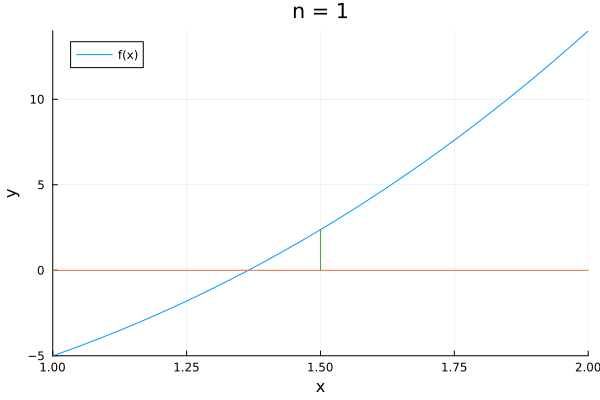

In [15]:
gif(anim,  fps = 1)